# Análise de Inadimplência de Crédito Básica | Projeto Final Python
Neste projeto final de Análise de Dados com Python, no curso de Cientista de Dados da EBAC - Escola Britânica de Artes e Tecnologia, iremos analisar e construir uma análise robusta usando Python e suas bibliotecas acerca de um dataset de clientes de um banco. Nosso objetivo com esse projeto é analisar os clientes adimplemntes e inadimplentes no cenário de oferta de crédito, e assim buscarmos entender e explorar os dados para compreender o que faz um cliente ser inadimplente.

## Descrição do Problema
A análise de risco é um tipo de análise de dados muito relevante e importante no mundo atual. Iremos aplicar uma forma de análise de risco com um dataset de inadimplência de clientes, disponível neste link: [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv). Nesse dataset, temos uma coluna de interesse chamada de 'default', que caracteriza os clientes adimplentes (0) e inadimplentes (1). Iremos fazer um processo de análise de dados, incluindo analisar as estatísticas dos dados, visualizar e interpretar os dados, explorar e tirar conclusões com base no dataset.

## Importação de Bibliotecas
Primeiro, iremos importar as bibliotecas necessárias para toda nossa análise. Neste projeto usaremos:
*   Pandas: biblioteca principal para manipular e modelar os dados.
*   Matplotlib e Seaborn: bibliotecas de visualizações de dados.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploração dos Dados
Primeiramente, vamos conduzir uma análise nos dados para entendermos sua estrutura e forma. Nesse processo, o foco é conhecermos todos os dados, analizarmos a estrutura ('schema') dos dados, e averiguarmos de antemão quais são os problemas no dataset que haveremos de resolver na etapa de limpeza.

In [3]:
# abrir o arquivo da análise disponível na web
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

# exibir as primeiras 5 linhas do arquivo
df.head(10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


Nesses dados, a coluna 'default' é nossa variável de interesse. Um valor de default = 0 indica um cliente adimplente, enquanto 1 = inadimplente. 
Também temos várias outras colunas categóricas e numéricas que nos serão de interesse para analisarmos os clientes.

In [4]:
# exibir a quantidade de linhas e de colunas, respectivamente:
df.shape

(10127, 16)

In [5]:
# exibir a quantidade de linhas e de colunas para default == 0
dados_bom_pagadores = df[df['default']== 0].shape

# linhas e colunas para default == 1
dados_mal_pagadores = df[df['default'] == 1].shape

print(dados_bom_pagadores)
print(dados_mal_pagadores)

(8500, 16)
(1627, 16)


In [7]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


### Schema dos Dados
Vamos analisar agora a estrutura dos dados e seus tipos.

In [6]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Como podemos ver, (`valor_transacoes_12m`) e (`qtd_transacoes_12m`) estão no formato _object_ ao invés de _float_. Teremos que lidar com isso.
Os demais tipos de dados relevantes parecem estar corretos.

Vamos analisar quais são nossos dados categóricos e quais são numéricos:

In [8]:
# filtrar o df para exibir apenas os dados do tipo 'object'
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


Como podemos ver, temos variáveis de que deveriam ser numéricas, que estão como categórias: é o caso de limite_credito e valor_transacoes_12m. Precisaremos lidar com isso futuramente, pois nesse formato não-numérico, os dados não poderão ser analisados.

In [9]:
# filtrar o df para exibir os dados numéricos
df.select_dtypes('int64').describe().transpose().round(1)

,count,mean,std,min,25%,50%,75%,max
id,10127.0,739177606.3,36903783.5,708082083.0,713036770.5,717926358.0,773143533.0,828343083.0
default,10127.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.3,8.0,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.3,1.3,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.9,8.0,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.8,1.6,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.5,1.1,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.3,1.0,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.9,23.5,10.0,45.0,67.0,81.0,139.0


### Dados Faltantes
Vamos analisar se o nosso dataset contém dados faltantes e lidarmos com esses dados.
Existem vários tipos de dados vazios. Quando definimos o DataFrame no começo do projeto, usamos o bloco de código (`na_values=na`) para definirmos que todos os dados vazios serão universalizados como 'na'.

In [10]:
# checar os dados vazios
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Vamos analisar os dados faltantes pra cada coluna do DataFrame:

In [11]:
# vamos criar um laço de repetição pra iterar sobre cada coluna e contar quantos valores são ausentes:
for col in df.columns:
    qtd_faltantes = df[df[col].isna()].shape[0]
    print(f"Coluna '{col}' tem {qtd_faltantes} valores ausentes.")

Coluna 'id' tem 0 valores ausentes.
Coluna 'default' tem 0 valores ausentes.
Coluna 'idade' tem 0 valores ausentes.
Coluna 'sexo' tem 0 valores ausentes.
Coluna 'dependentes' tem 0 valores ausentes.
Coluna 'escolaridade' tem 1519 valores ausentes.
Coluna 'estado_civil' tem 749 valores ausentes.
Coluna 'salario_anual' tem 1112 valores ausentes.
Coluna 'tipo_cartao' tem 0 valores ausentes.
Coluna 'meses_de_relacionamento' tem 0 valores ausentes.
Coluna 'qtd_produtos' tem 0 valores ausentes.
Coluna 'iteracoes_12m' tem 0 valores ausentes.
Coluna 'meses_inativo_12m' tem 0 valores ausentes.
Coluna 'limite_credito' tem 0 valores ausentes.
Coluna 'valor_transacoes_12m' tem 0 valores ausentes.
Coluna 'qtd_transacoes_12m' tem 0 valores ausentes.


In [12]:
# função para criar um df que contém as informações das colunas vazias
def stats_nulos(df):
    
    stats_dados_faltantes = []
    total_linhas_df = len(df)
    
    for col in df.columns:
        total_nulos_coluna = df[col].isna().sum()
        porcentagem = round(((total_nulos_coluna / total_linhas_df)*100),2)
        stats_dados_faltantes.append({'Coluna': col, 'Total': total_nulos_coluna, 'Porcentagem': porcentagem})
        
    df_stats = pd.DataFrame(stats_dados_faltantes)
    df_stats.sort_values(by='Porcentagem', ascending=False, inplace=True)
    df_stats['Porcentagem']
    
    return(df_stats)

stats_nulos(df)

,Coluna,Total,Porcentagem
5,escolaridade,1519,15.00
7,salario_anual,1112,10.98
6,estado_civil,749,7.40
0,id,0,0.00
3,sexo,0,0.00
2,idade,0,0.00
1,default,0,0.00
4,dependentes,0,0.00
8,tipo_cartao,0,0.00
9,meses_de_relacionamento,0,0.00


In [13]:
# calculando a estatística de valores nulos onde a coluna default é 0
stats_nulos(df=df[df['default'] == 0])

,Coluna,Total,Porcentagem
5,escolaridade,1263,14.86
7,salario_anual,925,10.88
6,estado_civil,620,7.29
0,id,0,0.00
3,sexo,0,0.00
2,idade,0,0.00
1,default,0,0.00
4,dependentes,0,0.00
8,tipo_cartao,0,0.00
9,meses_de_relacionamento,0,0.00


In [14]:
# calculando a estatística de valores nulos onde a coluna default é 1
stats_nulos(df=df[df['default'] == 1])

,Coluna,Total,Porcentagem
5,escolaridade,256,15.73
7,salario_anual,187,11.49
6,estado_civil,129,7.93
0,id,0,0.00
3,sexo,0,0.00
2,idade,0,0.00
1,default,0,0.00
4,dependentes,0,0.00
8,tipo_cartao,0,0.00
9,meses_de_relacionamento,0,0.00


Agora que compreendemos melhor a estrutura dos nossos dados, iremos transformar e realizar processos de limpeza para podermos trabalhar com os dados. 

## Limpeza e Transformação dos Dados
Nesta etapa, iremos aplicar uma série de métodos para limpar e transformar os dados, os tornando mais manuseáveis e preparados para nossas análises futuras. Nessa etapa, resolveremos o problema anterior que constatamos onde haviam tipos errados nos dados, e também lidaremos com os valores vazios.

### Correção do Schema
Enquanto explorávamos os dados na na etapa de exploração, notamos que haviam duas colunas que estavam com uma tipagem errada: **limite_credito** e **valor_transacoes_12m**. Ambas as colunas, que deveriam conter valores, estavam sendo interpretadas como colunas categórias `object`.
Nessa etapa, iremos averiguar o motivo pelo qual essa coluna está sendo identificado desta forma, e iremos mudar para a tipagem correta.

In [21]:
# ver os tipos das colunas de interesse
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          float64
valor_transacoes_12m    float64
dtype: object

In [16]:
# visualizar apenas as colunas de interesse
df[['limite_credito', 'valor_transacoes_12m']].head(5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Como podemos ver, o problema parece advir do fato de que essas colunas estão formatadas seguindo os padrões do Português Brasil, contendo ponto como separador de milhar e vírgula como separador decimal. No padrão da língua inglesa, onde o ponto é um separador decimal. Iremos aplicar uma função lambda para fazer a conversão necessária.

In [26]:
# função para converserter para float apenas quando o valor não mais for uma string
def converter_para_float(valor):
    if isinstance(valor, str):
        valor = valor.replace('.', '').replace(',', '.')
    return float(valor)

# Aplicando a função de conversão nas colunas
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(converter_para_float)
df['limite_credito'] = df['limite_credito'].apply(converter_para_float)

In [27]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Agora que corrigimos os tipos de todas as colunas para seus valores apropriados, podemos checar novamente quais são nossas variáveis categóricas (strings, representam categorias) e numéricas (int e floats, representam números e quantiddes):

In [24]:
# variáveis categóricas 
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [25]:
#varáveis numéricas
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


Essas informações serão relevantes para nós lidarmos com os dados no futuro.

### Removendo Nulos
Iremos agora remover os dados faltantes e analisarmos o impacto que isso trouxe nos dados:

In [28]:
df.dropna(inplace=True)

In [29]:
linhas, colunas = df.shape
print(f'linhas: {linhas}, colunas: {colunas}')

linhas: 7081, colunas: 16


In [30]:
linhas, colunas = df[df['default'] == 0].shape
print(f'linhas: {linhas}, colunas: {colunas}')

linhas: 5968, colunas: 16


In [31]:
linhas, colunas = df[df['default'] == 1].shape
print(f'linhas: {linhas}, colunas: {colunas}')

linhas: 1113, colunas: 16


Vamos analisar as proporções de clientes adimplentes e inadimplentes com base no novo DataFrame filtrado e sem valores nulos.

In [32]:
# atribuindo variáveis para a quantidade de linhas do novo DataFrame, e para os DataFrames filtrados.
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [33]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


## Visualização de Dados
Agora que temos um novo df sem valores nulos e com os dados devidamente tratados, podemos começar a etapa de visualização de dados. Nesta etapa, visaremos 'visualizar' os dados e obter insights com base nos dados. Iremos usar principalmente as bibliotecas do `matplotlib` e `seaborn`.
Lembrando novamente o objetivo de nossa análise, queremos analisar os dados para encontrar principalmente informações que nos ajudem a avaliar o que pode determinar clientes adimplentes vs inadimplentes.

### Visualização Categórica
Primeiro, iremos analisar os dados categóricos e entender o que eles tem a ver com nossa variável resposta `default`

In [34]:
# visualizando os dados com coluna 'object' (categórica)
df.select_dtypes('object').head(5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


In [35]:
# separar os df em df_adimplente e df_inadimplente

df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

#### Escolaridade
Vamos criar três gráficos usando `matplotlib` para analisarmos a relação entre a escolaridade dos clientes inadimplentes, adimplentes e o total de clientes, para obtermos insights valiosos.

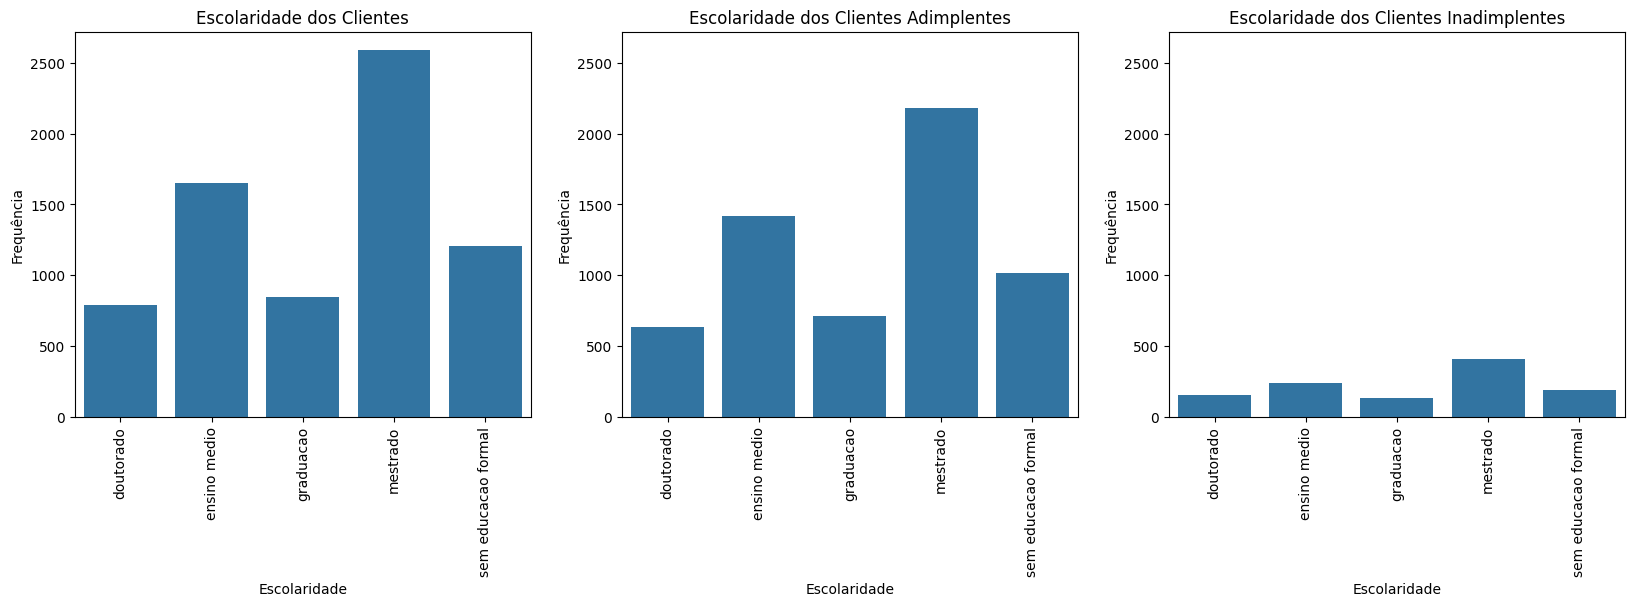

In [36]:
# definindo a coluna de interesse e os títulos para os gráficos
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes' , 'Escolaridade dos Clientes Adimplentes' , 'Escolaridade dos Clientes Inadimplentes']

# inicializando o índice do subplot e o valor máximo para o eixo y
indice_subplot = 0
maximo_eixo_y = 0

# criando a figura com 3 subplots alinhados horizontalmente
figura, subplots = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

# iterando sobre cada DataFrame para gerar os gráficos
for dataframe in [df, df_adimplente, df_inadimplente]:
    
    df_para_plot = dataframe[coluna].value_counts().reset_index() # calculando a frequência de cada categoria na coluna selecionada
    df_para_plot.columns = [coluna, 'frequencia']
    df_para_plot.sort_values(by=coluna, inplace=True) # ordenando os dados
    
    # Criando o gráfico de barras no subplot atual
    grafico = sns.barplot(
        x=df_para_plot[coluna],
        y=df_para_plot['frequencia'],
        ax=subplots[indice_subplot]
    )
    
    # Configurando o título e os rótulos dos eixos
    grafico.set(
        title=titulos[indice_subplot],
        xlabel=coluna.capitalize(),
        ylabel='Frequência'
    )
    # Rotacionando os rótulos do eixo x para melhor leitura
    grafico.tick_params(axis='x', rotation=90)
    
    # Atualizando o valor máximo do eixo y para padronizar a escala
    _, maximo_eixo_y_atual = grafico.get_ylim()
    maximo_eixo_y = max(maximo_eixo_y, maximo_eixo_y_atual)
    grafico.set(ylim=(0, maximo_eixo_y))
    
    # Avançando para o próximo subplot
    indice_subplot += 1

Como podemos ver, os três gráficos gerados analisam a frequência de cada tipo de escolaridade dos clientes para o total de dados, os dados adimplentes e os dados inadimplentes. Note que nos dados inadimplentes, os números são mais reduzidos por que, como constatamos em etapas anteriores, a proporção de inadimplentes é consideravelmente menor. 
Podemos observar que os dados de clientes Inadimplentes seguem praticamente uma distribuição no mesmo formato que para os demais clientes, significando que a variável de escolaridade não define tão bem clientes inadimplentes. 

#### Salário Anual

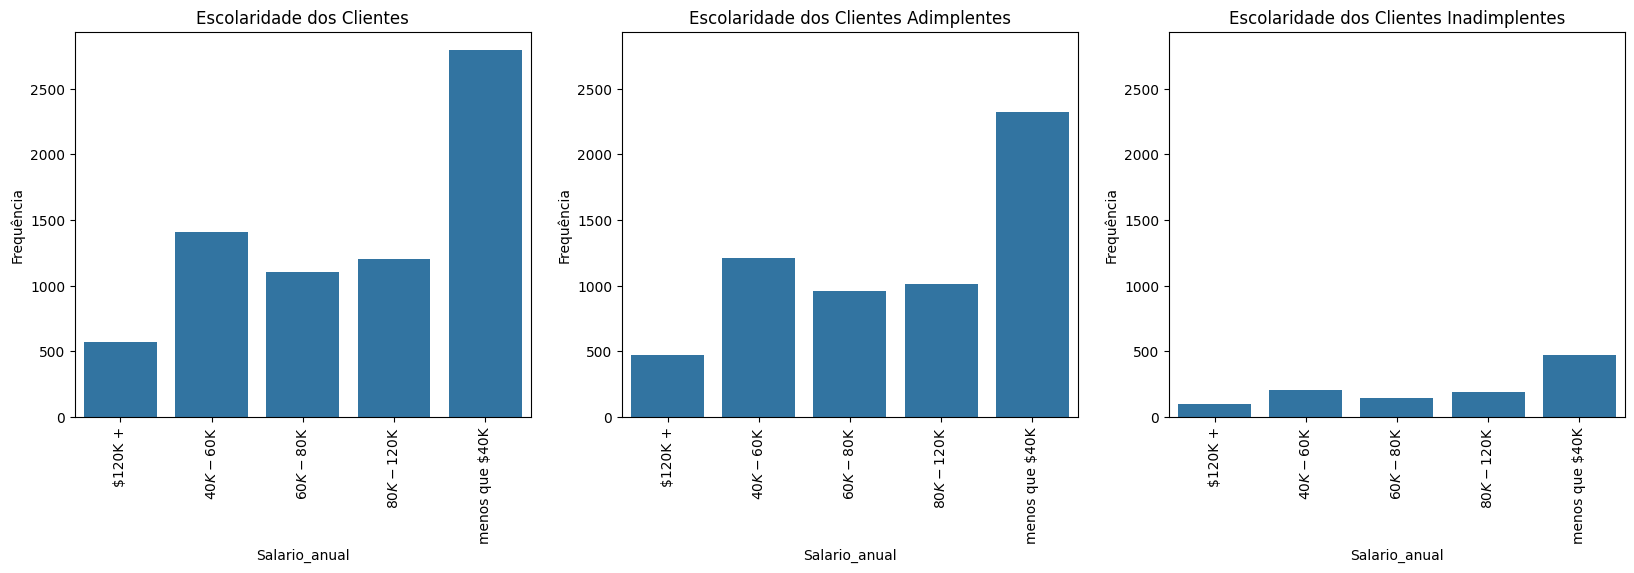

In [37]:
# definindo a coluna de interesse e os títulos para os gráficos
coluna = 'salario_anual'
titulos = ['Escolaridade dos Clientes' , 'Escolaridade dos Clientes Adimplentes' , 'Escolaridade dos Clientes Inadimplentes']

# inicializando o índice do subplot e o valor máximo para o eixo y
indice_subplot = 0
maximo_eixo_y = 0

# criando a figura com 3 subplots alinhados horizontalmente
figura, subplots = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

# iterando sobre cada DataFrame para gerar os gráficos
for dataframe in [df, df_adimplente, df_inadimplente]:
    
    df_para_plot = dataframe[coluna].value_counts().reset_index() # calculando a frequência de cada categoria na coluna selecionada
    df_para_plot.columns = [coluna, 'frequencia']
    df_para_plot.sort_values(by=coluna, inplace=True) # ordenando os dados
    
    # Criando o gráfico de barras no subplot atual
    grafico = sns.barplot(
        x=df_para_plot[coluna],
        y=df_para_plot['frequencia'],
        ax=subplots[indice_subplot]
    )
    
    # Configurando o título e os rótulos dos eixos
    grafico.set(
        title=titulos[indice_subplot],
        xlabel=coluna.capitalize(),
        ylabel='Frequência'
    )
    # Rotacionando os rótulos do eixo x para melhor leitura
    grafico.tick_params(axis='x', rotation=90)
    
    # Atualizando o valor máximo do eixo y para padronizar a escala
    _, maximo_eixo_y_atual = grafico.get_ylim()
    maximo_eixo_y = max(maximo_eixo_y, maximo_eixo_y_atual)
    grafico.set(ylim=(0, maximo_eixo_y))
    
    # Avançando para o próximo subplot
    indice_subplot += 1

Com o salário anual, temos um padrão parecido: os dados dos clientes inadimplentes seguem uma distribuição próxima a dos demais clientes, e assim concluimos que esta variável categórica também não nos fornece informações o suficiente para tomarmos decisões e obtermos informações com elas.

### Visualização Numérica
Agora, iremos analisar as variáveis numéricas dos nossos dados, e tentar encontrar um padrão ou alguma pista que nos ajudará a prever e obter informações sobre a característica dos clientes inadimplentes.

Aqui, com a análise da quantidade de transações no último ano, podemos observar um comportamento diferente. Para os clientes gerais

In [38]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


In [39]:
print(f'{df.shape}, {df_adimplente.shape}, {df_inadimplente.shape}')

(7081, 16), (5968, 16), (1113, 16)


#### Análise de Transações no Último Ano

C:\Users\Bruno\AppData\Local\Temp\ipykernel_15340\3045762736.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figura.show()


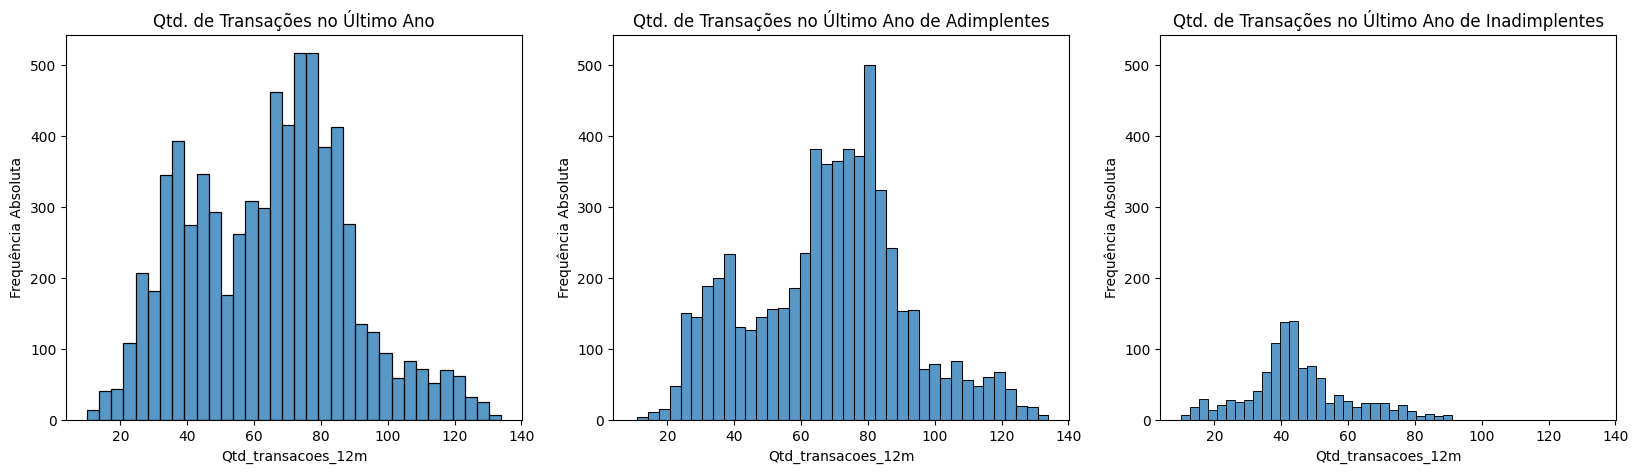

In [40]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

A distribuição desses dados nos trouxe algo bem interessante. Podemos observar que, na distribuição dos dados completos, no primeiro gráfico, tem dois **picos**: um pico entre 60 a 90 quantidade de transações, e um pico menor entre 25 a 50. Contudo, esse formato de pico não necessariamente se reflete da mesma forma na distribuição dos demais gráficos: note como, no segundo gráfico, o segundo pico, entre 25 a 50, embora presente, é bem menor, e o pico de 80-100 é mais acentuado.


Assim, quando analisamos a quantidade de transações dos clientes inadimplentes, observamos uma distribuição bem centrada em uma range específica, de dados entre 25 a 50 quantidade de transações, exatamante a range do pico que estava "faltando" na distribuição dos clientes adimplentes. 

Ou seja, com essa observação, podemos constatar que de fato, os cliente inadimplentes diferem-se dos clientes adimplentes no quesito da variável numérica `Qtd. de Transações`. Os clientes inadimplentes tendem a ter uma concentração muito mais centrada em menores quantidades de transações, entre 25 a 50 transações, enquanto clientes adimplentes frequentemente possuem entre 60 a 90 quantidade de transações.

#### Análise de Valor de Transações
Por fim, como última variável numérica, analisaremos a variável numérica 'Valor de Transações' para averiguarmos se os valores de transação também significam muito nos dados, e como podemos lidar com essa informação.

C:\Users\Bruno\AppData\Local\Temp\ipykernel_15340\2983857526.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figura.show()


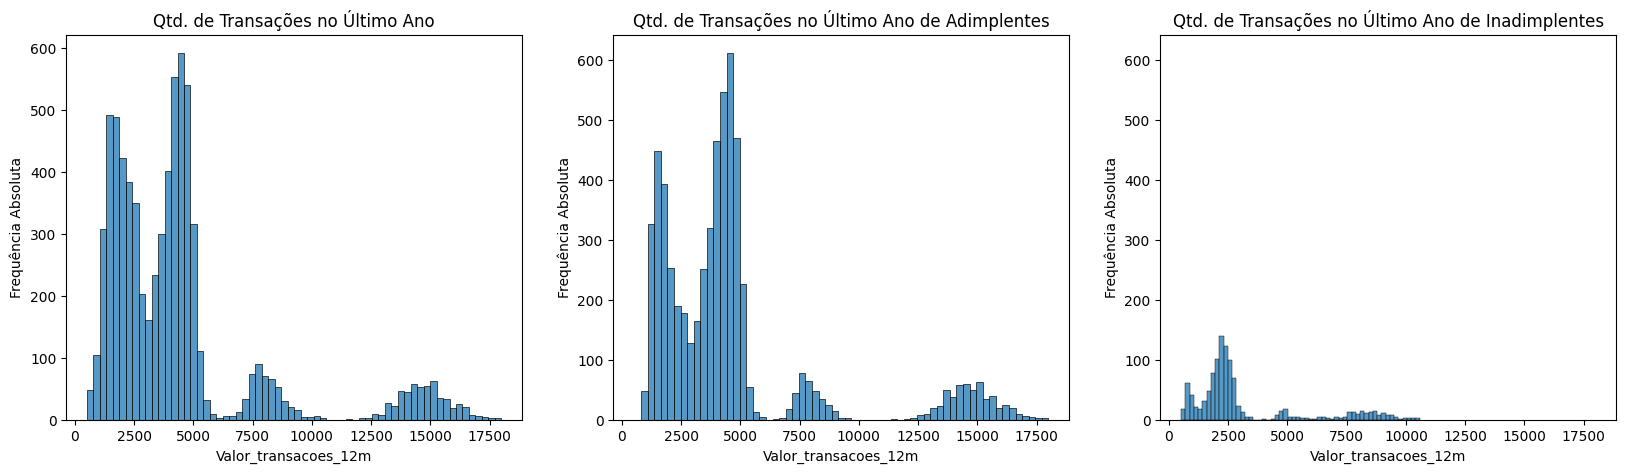

In [41]:
coluna = 'valor_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Aqui, podemos observar outro comportamente interessante, semelhante ao que ocorreu com a variável de quantidade de transações. Temos, nos dados completos, dois picos principais seguidos de dois picos menores com valores de transação mais altos. Esses picos mais altos também estão presentes nos clientes adimplentes, porém não estão presentes nos clientes inadimplentes, o que significa que clientes inadimplentes dificilmente possuem valores de transação altos nos últimos 12 meses. Além disso, a distribuição dos dados gerais nos mostram que o segundo maior pico, representando os clientes com baixo valor de transação (entre 1000 a 2500), acabou se "afinando" e diminuindo de tamanho nos clientes adimplentes, apenas para aparecer novamente representando um grande número de dados na distribuição dos clientes inadimplentes. 
Isso é um forte indicativo de quê os clientes inadimplentes representam um volume grande desse pico de clientes que gastam menos em valor de transação.

Ou seja, com essas análises, constatamos que de fato, os clientes inadimplentes se diferem dos clientes adimplentes também nesse aspecto: 
*   Os clientes inadimplentes raramente gastam nos últimos 12m valores altos, e nenhum cliente inadimplente faz parte do grupo que gasta entre 12500 a 17500 nos últimos 12m, indicando que clientes inadimplentes geralmente tem menos atividade de transações.
*   Os clientes inadimplentes representam um volume significativo dos dados dos clientes com menor valor de transação nos últimos 12m, o que significa que os clientes inadimplentes tendem a gastar menos.

#### Valor x Quantidade de Transações
Para finalizar a visualização dos nossos dados, analisaremos num gráfico de dispersão a relação entre as duas variáveis numéricas que vimos comprovadamente serem mais influentes na decisão de clientes adimplentes vs inadimplentes: `qnt_transacoes_12m` e `valor_transacoes_12m`.

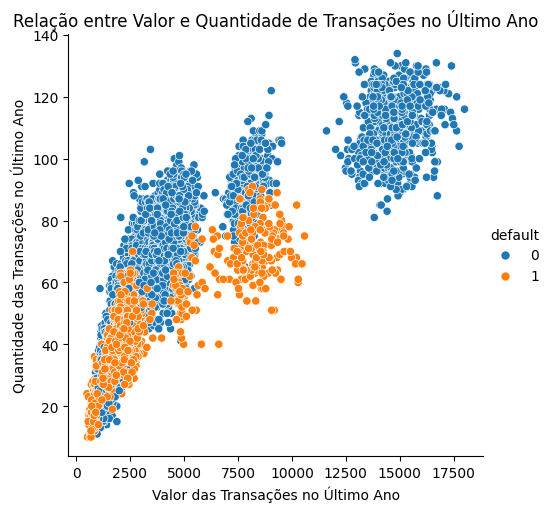

In [42]:
# gráfico de dispersão comparando as duas variáveis numéricas
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

Como é possível de ver, temos um grande número de clientes no canto superior direito onde não há nenhuma instância de cliente inadimplente, o que significa que esse grupo de cliente que tente a gastar mais e mais frequentemente dificilmente são clientes inadimplentes.
Por outro lado, temos a presença de clientes inadimplentes em dois grupos principais: 

*   Clientes com baixos valores de transação no último ano, e com baixa quantidade de transações no último ano.
*   Clientes com médio valor de transações no último ano, e média quantidade de transações no último ano, principalmente abaixo de 80 transações no último ano.

## Conclusões das Análises
Finalmente, após todo esse processo, podemos dar considerações finais sobre os dados, reunir resultados e informações que obtemos com os dados, e assim, sugerir tomada de decisões com os dados.

### Interpretação da Análise
A principal interpretação desses dados é que **as variáveis numéricas são muito mais indicativas de clientes inadimplentes** do que as variáveis categórias. Temos a diferença nítida entre clientes inadimplentes e adimplentes nos casos onde analisamos as variáveis de valor de transações e quantidade de transações nos últimos 12m, o que significa que clientes adimplentes e inadimplentes possuem diferentes padrões de compra. Aqui está um breve sumário de insights relevantes:

*   Clientes inadimplentes muito raramente estão entre os que gastam mais frequentemente, e dificilmente passam da média de valor de transações.
*   A grande maioria dos clientes inadimplentes tem menos de 80 transações no último ano, com a grande maioria das transações concentrada entre 40 a 80. 
*   Clientes inadimplentes quase unanemente formam o grupo "de baixo" no gráfico de quantidade de transações, significando que, para um grupo de clientes, os clientes com menores quantidade de transações nos últimos 12m são os que mais tem chances de serem clientes inadimplentes.
*   Clientes que gastam menos de 5000 no último ano, porém possuem mais de 50 transações no último ano, raramente são inadimplentes. Por outro lado, se tratando de até 10000 gasto no último ano, acima de 90 transações do último ano param de aparecer clientes inadimplentes. Não existem clientes inadimplentes que gastam mais de 12500 nos últimos 12 meses.

### Tomada de Decisões
A tomada de decisões com os dados é muito importante. Abaixo estão algumas sugestões de tomada de decisões que podemos realizar com os insights que obtivemos:

*   Clientes que possuem pouca quantidade de transações e gastam pouco são os mais vulneráveis a se tornarem inadimplentes. Precisamos de medidas que evitem que esses clientes tornem-se potenciais mal pagadores, como limitar oferta de crédito perante análise específica, e apoio para os clientes com opções menos arriscadas.
*   Clientes que gastam acima de 12000 e possuem acima de 80 transações anuais nunca são inadimplentes, o que significa que esse grupo de clientes deve ser valorizado e mantido, pois potencilamente são os clientes mais fiéis e importantes.
*   Clientes inadimplentes são extremamente comuns entre faixas de menos de 50 transações anuais, por isso, deve ser feito um policiamento e criar políticas e normais para limitar e gerir bem o risco de oferta de crédito para clientes abaixo deste threshold.